In [1]:
import pandas as pd
import numpy as np
import os
import sys

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from data_loader import CSVDataloader, get_file_path
from data_processing import FeatureVisualizer

## Load Credit Risk data for Analysis

In [2]:
# Load AAPL data
data = get_file_path("csvpath")
df = CSVDataloader(data).load_data()

In [3]:
# Call functions
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Overview of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.size

1530592

In [9]:
df.shape

(95662, 16)

In [10]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

### Summary Statistics

In [5]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

In [14]:
# Central Tendency
print("\n--- Central Tendency ---")
print("Mean:\n", numeric_cols.mean())
print("Median:\n", numeric_cols.median())
print("Mode:\n", numeric_cols.mode().iloc[0])


--- Central Tendency ---
Mean:
 CountryCode         256.000000
Amount             6717.846433
Value              9900.583941
PricingStrategy       2.255974
FraudResult           0.002018
dtype: float64
Median:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
dtype: float64
Mode:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
Name: 0, dtype: float64


In [16]:
# Dispersion
print("\n--- Dispersion ---")
print("Standard Deviation:\n", numeric_cols.std())


--- Dispersion ---
Standard Deviation:
 CountryCode             0.000000
Amount             123306.797164
Value              123122.087776
PricingStrategy         0.732924
FraudResult             0.044872
dtype: float64


In [17]:
print("Variance:\n", numeric_cols.var())

Variance:
 CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64


In [18]:
print("Range:\n", numeric_cols.max() - numeric_cols.min())

Range:
 CountryCode               0.0
Amount             10880000.0
Value               9879998.0
PricingStrategy           4.0
FraudResult               1.0
dtype: float64


In [19]:
print("Interquartile Range (IQR):\n", numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25))

Interquartile Range (IQR):
 CountryCode           0.0
Amount             2850.0
Value              4725.0
PricingStrategy       0.0
FraudResult           0.0
dtype: float64


In [6]:
# Shape of Distribution
print("\n--- Shape of Distribution ---")
print("Skewness:\n", numeric_cols.skew())


--- Shape of Distribution ---
Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [21]:
print("Kurtosis:\n", numeric_cols.kurtosis())

Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


### Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


In [3]:
preprocess = FeatureVisualizer(df)

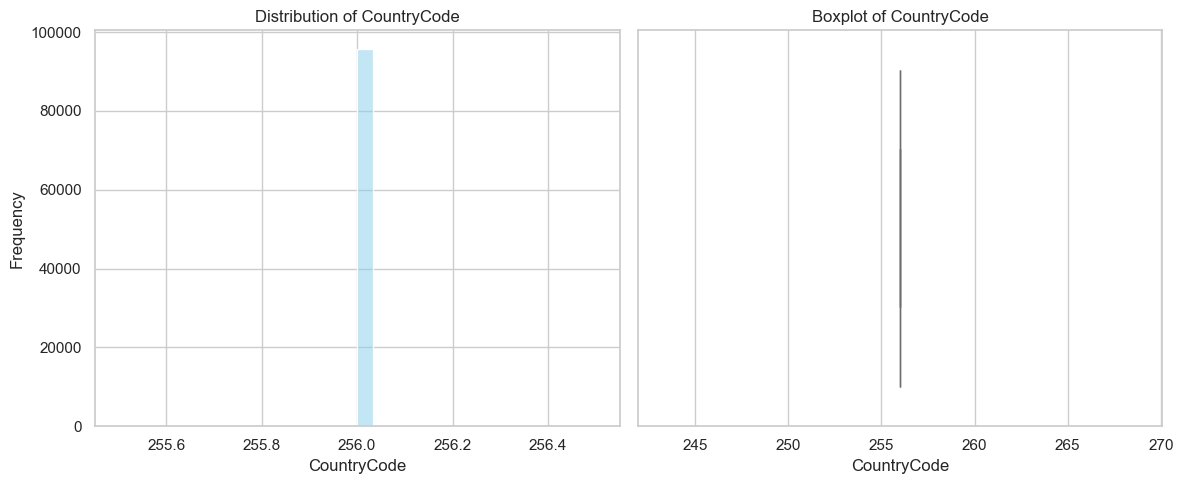

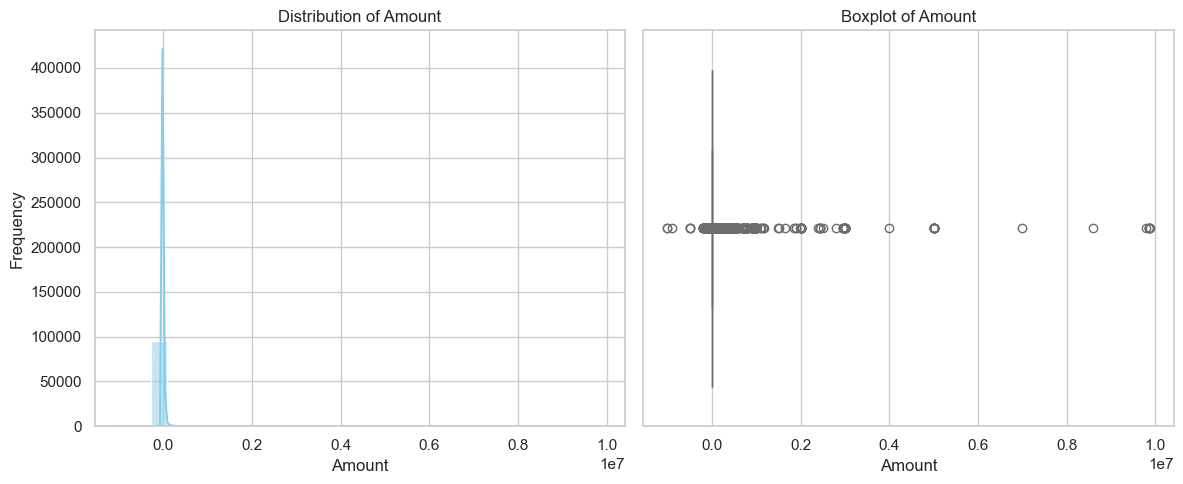

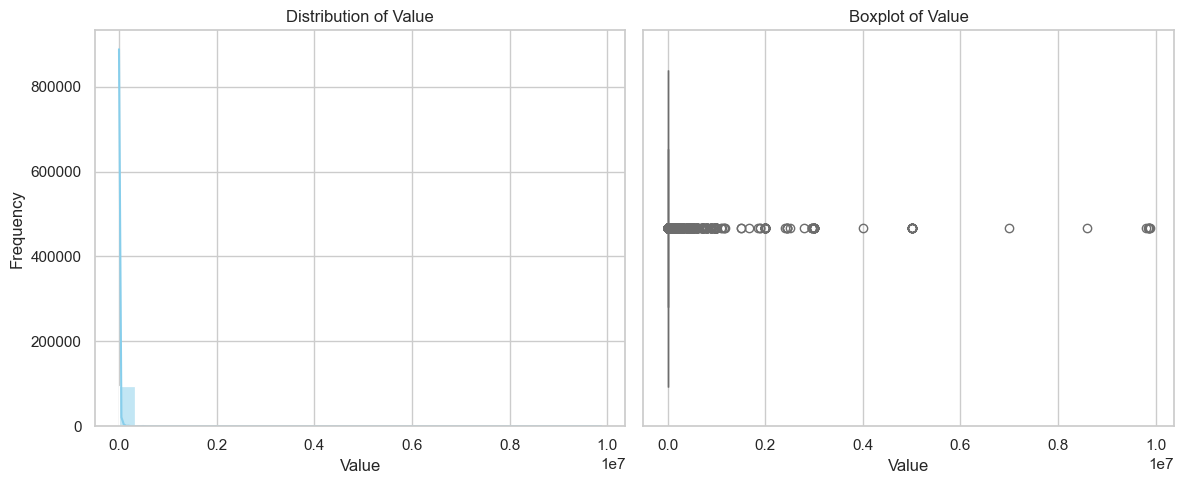

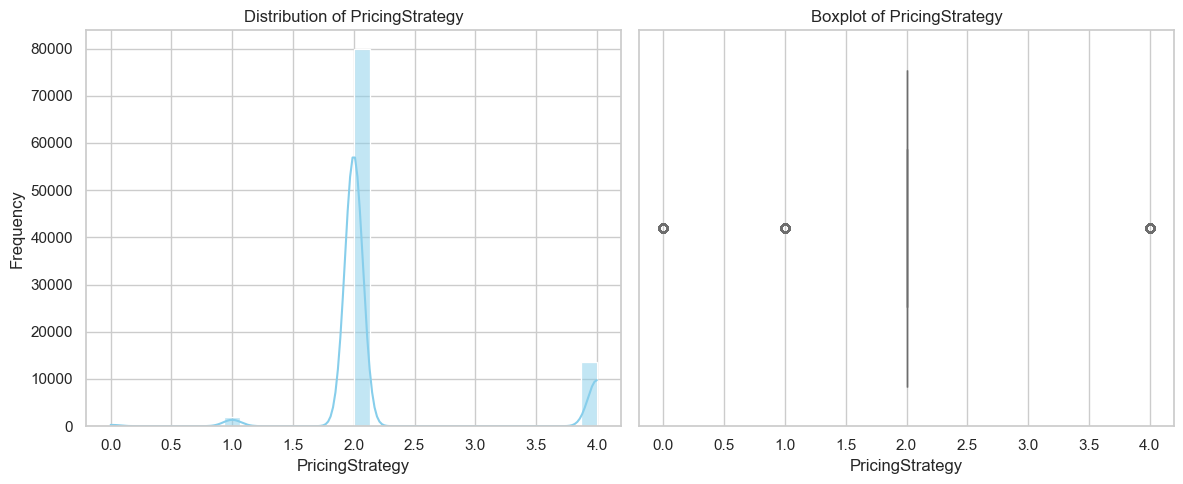

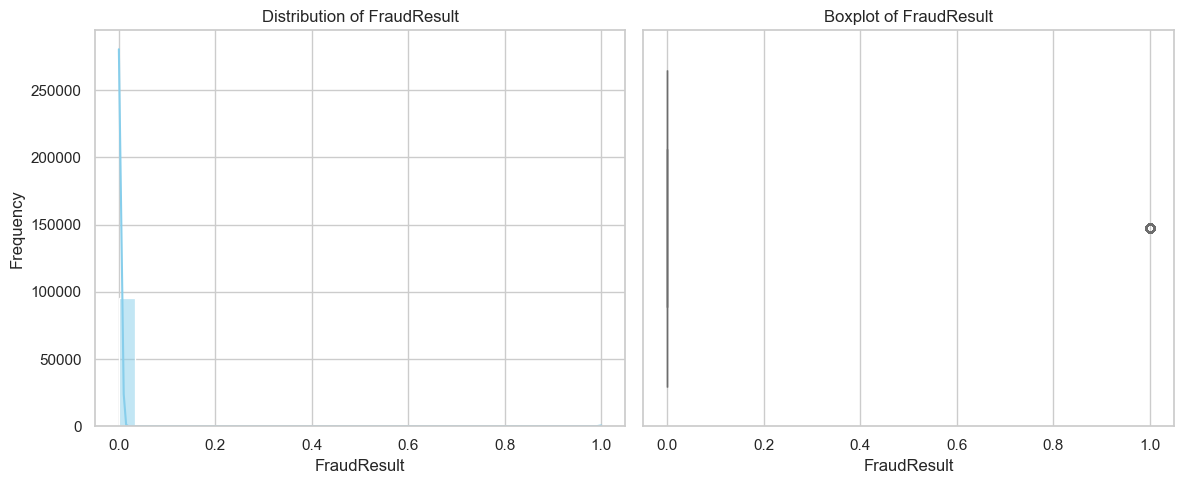

In [9]:
preprocess.numeric_distributions()

### Distribution of Categorical Features

In [ ]:
preprocess.categorical_distributions()